<a href="https://colab.research.google.com/github/lilianchambiri/Assignment1/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
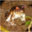

In [3]:
x_train[0]

In [4]:
y_train[0]

array([6], dtype=uint8)

In [5]:
# scaling data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [6]:
print(x_train_scaled.shape)
print(y_train.shape)
print(x_test_scaled.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
x_train_scaled[0].reshape(32*32*3,).shape

(3072,)

In [ ]:
# Flattening data
x_train_flatten = x_train_scaled.reshape(50000,32*32*3)
x_test_flatten = x_test_scaled.reshape(10000,32*32*3)

In [ ]:
x_train_flatten.shape

(50000, 3072)

In [ ]:
# defining model
model = keras.Sequential([
    keras.layers.Dense(units=1024,activation="relu", kernel_regularizer= keras.regularizers.L2(), input_shape= (3072,)),
    keras.layers.Dense(units=512, activation="relu"),
    keras.layers.Dense(units=256, activation="relu"),
    keras.layers.Dense(units=128, activation= "relu"),
    keras.layers.Dense(units= 10, activation= "softmax")
])

In [ ]:
x_train_flatten.shape

(50000, 3072)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 3837066 (14.64 MB)
Trainable params: 3837066 (14.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",
             loss= "sparse_categorical_crossentropy",
             metrics= ["accuracy"])

In [ ]:
model.fit(x=x_train_flatten,y= y_train, epochs=20, validation_data= (x_test_flatten, y_test))

Epoch 1/20
1563/1563 [==============================] - 10s 5ms/step - loss: 2.4020 - accuracy: 0.2299 - val_loss: 2.0929 - val_accuracy: 0.2612
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9964 - accuracy: 0.2936 - val_loss: 1.9036 - val_accuracy: 0.3182
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9193 - accuracy: 0.3268 - val_loss: 1.8588 - val_accuracy: 0.3444
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8844 - accuracy: 0.3406 - val_loss: 1.7922 - val_accuracy: 0.3765
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8548 - accuracy: 0.3502 - val_loss: 1.8670 - val_accuracy: 0.3557
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8412 - accuracy: 0.3584 - val_loss: 1.7985 - val_accuracy: 0.3746
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8247 - accuracy: 0.3661 - val_loss: 1.7643 - val_accuracy

In [ ]:
# Save the tensorflow model
model.save("cifar10_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Upload the model
model_upload = keras.models.load_model("/content/cifar10_model.h5")

In [ ]:
model_upload.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 3837066 (14.64 MB)
Trainable params: 3837066 (14.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_upload.evaluate(x_train_flatten, y_train)

1563/1563 [==============================] - 5s 3ms/step - loss: 1.7516 - accuracy: 0.3900


[1.7516459226608276, 0.38999998569488525]

In [ ]:
model_upload.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7785 - accuracy: 0.3889


[1.7785292863845825, 0.3889000117778778]

In [ ]:
y_train_pred = model_upload.predict(x_train_flatten)
y_test_pred = model_upload.predict(x_test_flatten)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_train_pred.shape

(50000, 10)

In [ ]:
y_train_pred_final = [np.argmax(i) for i in y_train_pred]
y_test_pred_final = [np.argmax(i) for i in y_test_pred]

In [ ]:
len(y_train_pred_final)

50000

In [ ]:
from sklearn.metrics import classification_report
print("Training Report")
print(classification_report(y_train, y_train_pred_final))
print()
print("Test Resport")
print(classification_report(y_test, y_test_pred_final))


Training Report
              precision    recall  f1-score   support

           0       0.45      0.55      0.49      5000
           1       0.55      0.38      0.45      5000
           2       0.31      0.23      0.26      5000
           3       0.32      0.21      0.25      5000
           4       0.28      0.43      0.34      5000
           5       0.49      0.21      0.30      5000
           6       0.42      0.33      0.37      5000
           7       0.31      0.65      0.42      5000
           8       0.60      0.41      0.48      5000
           9       0.44      0.50      0.47      5000

    accuracy                           0.39     50000
   macro avg       0.42      0.39      0.38     50000
weighted avg       0.42      0.39      0.38     50000


Test Resport
              precision    recall  f1-score   support

           0       0.44      0.55      0.49      1000
           1       0.56      0.36      0.44      1000
           2       0.31      0.25      0.28     

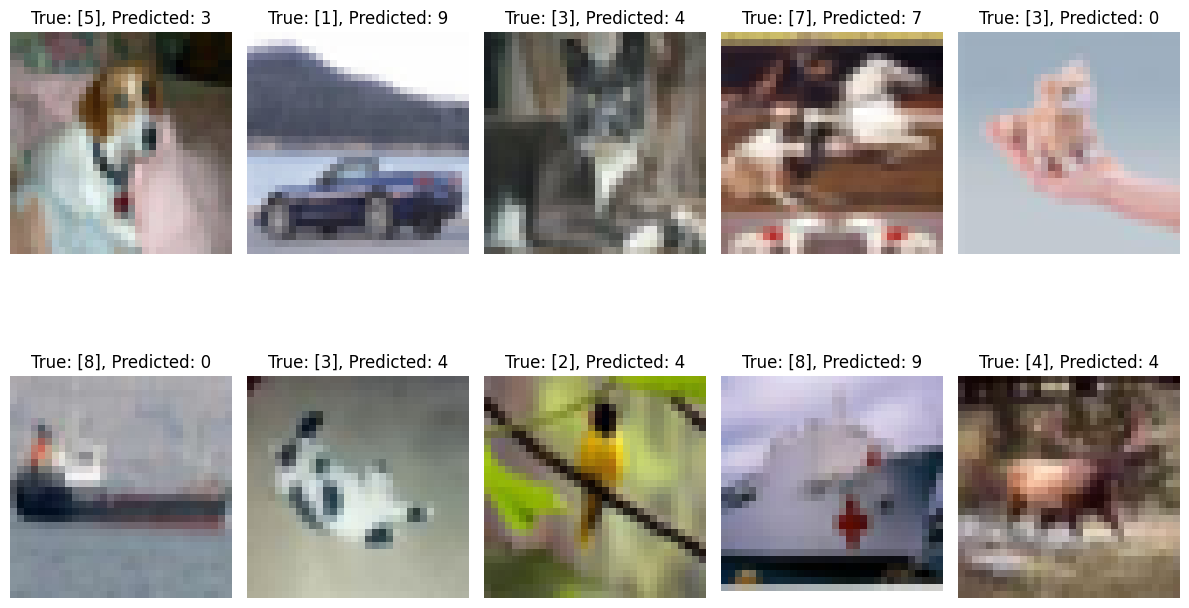

In [ ]:
# Select 10 random indices from the test set
random_indices = np.random.choice(len(y_test), size=10, replace=False)

# Extract the corresponding true labels and predicted labels
true_labels = y_test[random_indices]
predicted_labels = np.array(y_test_pred_final)[random_indices]

# Display the grid
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[random_indices[i]])
    plt.title(f'True: {true_labels[i]}, Predicted: {predicted_labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


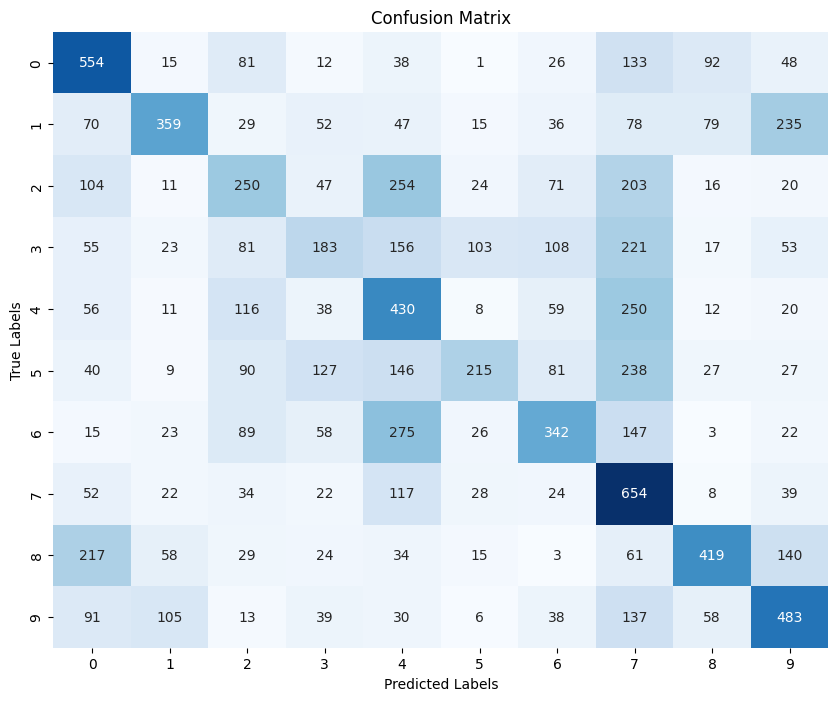

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_final)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
